In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier

<h1>데이터셋 불러오기

In [59]:
# 첫 번째 열(인덱스) 제거 후 불러옴
df = pd.read_csv('dataset.csv', index_col=0)

In [60]:
# 컬럼 확인
df.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [61]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11055 entries, 1 to 11055
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  int64


In [62]:
# 특정 피처 드랍
columns_to_drop = [
    'web_traffic',
    'Page_Rank',
    'Links_pointing_to_page',
    'Statistical_report',
    'Domain_registeration_length',
    'DNSRecord',
    'Abnormal_URL'
]

df = df.drop(columns=columns_to_drop)

In [63]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11055 entries, 1 to 11055
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_IPhaving_IP_Address  11055 non-null  int64
 1   URLURL_Length               11055 non-null  int64
 2   Shortining_Service          11055 non-null  int64
 3   having_At_Symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   Prefix_Suffix               11055 non-null  int64
 6   having_Sub_Domain           11055 non-null  int64
 7   SSLfinal_State              11055 non-null  int64
 8   Favicon                     11055 non-null  int64
 9   port                        11055 non-null  int64
 10  HTTPS_token                 11055 non-null  int64
 11  Request_URL                 11055 non-null  int64
 12  URL_of_Anchor               11055 non-null  int64
 13  Links_in_tags               11055 non-null  int64
 14  SFH        

In [64]:
# 데이터 크기 확인
df.shape

(11055, 24)

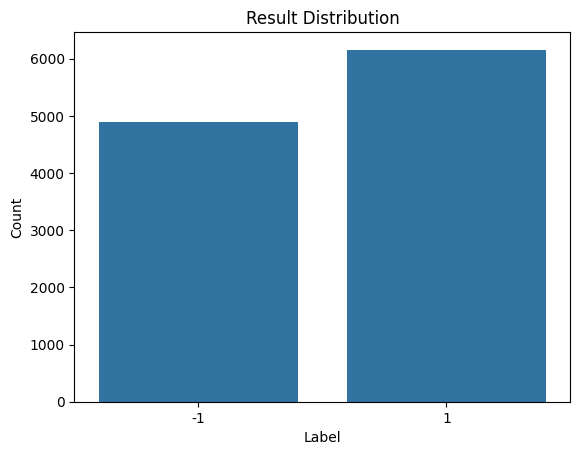

In [65]:
sns.countplot(x='Result', data=df)
plt.title('Result Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

<h1>데이터 분할

In [66]:
X = df.drop(columns=['Result']) # 'Result' 열은 phising/legitimate 데이터 가지고 있음
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>모델 객체 생성

In [67]:
xgb = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.4,
    n_estimators=200,
    max_depth=7,
    )

# # 최적 파라미터 적용
# xgb = XGBClassifier(
#     objective='binary:logistic',
#     colsample_bytree = 0.8,
#     learning_rate=0.2,
#     n_estimators=300,
#     min_child_weight = 1,
#     subsample = 0.8,
#     max_depth=5,
#   )

In [68]:
# 타겟 값 변환 (-1을 0으로 변환)
# XGBoost 모델이 기대하는 형식[0 1]과 맞춤
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

# 변환 후 고유 값 및 빈도 확인
print("변환 후 y_train 고유 값:", pd.Series(y_train).unique())
print("변환 후 y_train 유일한 값 개수:\n", pd.Series(y_train).value_counts())
print()
print("변환 후 y_test 고유 값:", pd.Series(y_test).unique())
print("변환 후 y_test 유일한 값 개수:\n", pd.Series(y_test).value_counts())

변환 후 y_train 고유 값: [1 0]
변환 후 y_train 유일한 값 개수:
 Result
1    4902
0    3942
Name: count, dtype: int64

변환 후 y_test 고유 값: [0 1]
변환 후 y_test 유일한 값 개수:
 Result
1    1255
0     956
Name: count, dtype: int64


<h1>모델 학습

In [69]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<h1>모델 평가

In [70]:
# 일반화 성능 평가용
y_test_pred = xgb.predict(X_test)

# 과적합 여부 확인
y_train_pred = xgb.predict(X_train)

# 검증 정확도 계산
acc_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {acc_test}")

# 훈련 정확도 계산
acc_train = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {acc_train}")

Test Accuracy: 0.9538670284938942
Train Accuracy: 0.9707146087743103


<h1>분류 보고서

In [71]:
# 테스트셋 분류 보고서
test_report = classification_report(y_test, y_test_pred, target_names=['-1', '1'])
print("Test Classification Report:")
print(test_report)

Test Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [72]:
# 훈련셋 분류 보고서
train_report = classification_report(y_train, y_train_pred, target_names=['-1', '1'])
print("Train Classification Report:")
print(train_report)

Train Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      3942
           1       0.97      0.98      0.97      4902

    accuracy                           0.97      8844
   macro avg       0.97      0.97      0.97      8844
weighted avg       0.97      0.97      0.97      8844



<h1>혼동 행렬

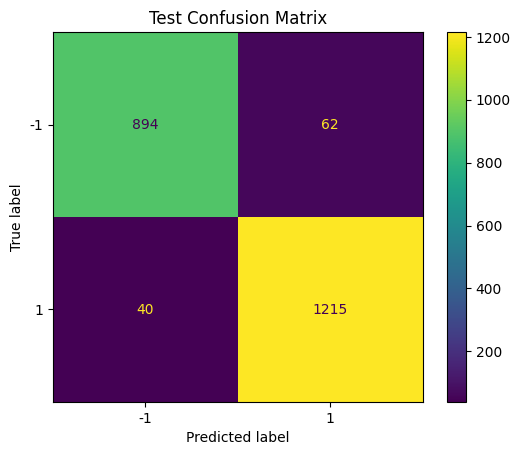

In [73]:
# 테스트 데이터 혼동 행렬
test_conf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

disp_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=[-1, 1])
disp_test.plot()
plt.title('Test Confusion Matrix')
plt.show()

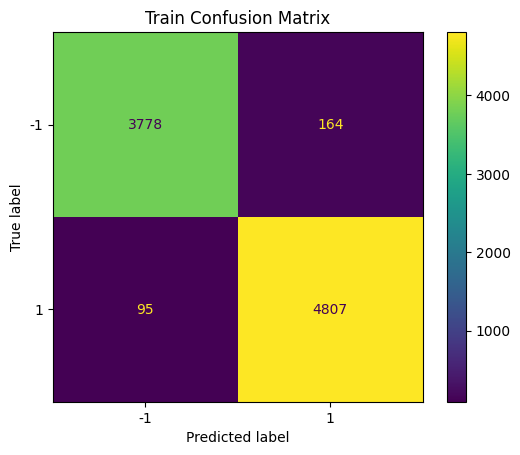

In [74]:
# 훈련 데이터 혼동 행렬
train_conf_matrix = confusion_matrix(y_train, y_train_pred, labels=[0, 1])

disp_train = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=[-1, 1])
disp_train.plot()
plt.title('Train Confusion Matrix')
plt.show()

<h1>교차 검증

In [75]:
# 5-fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='accuracy')

# 교차 검증 결과 출력
for i, score in enumerate(cv_results):
    print(f"교차 검증 {i} 정확도: {score:.4f}")

# 평균 정확도 출력
mean_cv_score = cv_results.mean()
print(f"평균 정확도: {mean_cv_score:.4f}")

교차 검증 0 정확도: 0.9576
교차 검증 1 정확도: 0.9469
교차 검증 2 정확도: 0.9604
교차 검증 3 정확도: 0.9548
교차 검증 4 정확도: 0.9542
평균 정확도: 0.9548


# 하이퍼파라미터 튜닝

In [76]:
# 하이퍼파라미터 튜닝
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_xgb = GridSearchCV(xgb, param_grid=parameters, scoring='accuracy', n_jobs=-1, cv=5)
grid_xgb.fit(X_train, y_train)

print('XGBoost 최적 하이퍼 파라미터 :', grid_xgb.best_params_)
print('XGBoost 최고 정확도: {0:.4f}'.format(grid_xgb.best_score_))

# 최적 모델 평가
best_xgb = grid_xgb.best_estimator_
dpredictions = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 최적 XGBoost 정확도 : {0:.4f}'.format(accuracy))

XGBoost 최적 하이퍼 파라미터 : {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
XGBoost 최고 정확도: 0.9539
테스트 세트에서의 최적 XGBoost 정확도 : 0.9525


# pkl 파일 저장

In [78]:
# 모델을 pkl 파일로 저장
import pickle

try:
    with open('XGBoost_column_drop_model.pkl', 'wb') as f:
        pickle.dump(xgb, f)
    print("모델이 성공적으로 저장되었습니다.")
except Exception as e:
    print(f"모델 저장 중 오류 발생: {e}")

모델이 성공적으로 저장되었습니다.
